# Introduction

In this notebook, we will get started by importing and cleaning the LendingClub dataset, which will be used throughout the course.

We will achieve this by leveraging key data cleaning techniques in Python using Pandas, among other libraries.


## Agenda:
1. Importing data for your Data Science project
2. Understanding your data and cleaning it:initial exploration and stats
3. Handling missing values
4. Removing duplicates
5. Handling outliers
6. Text data handling
7. Intro to time series data


Demo: Implementation in Python
------------------------------


---


### Set up

#### User-specified parameters

In [1]:
python_material_folder_name = "python-material"

#### Import libraries

In [2]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Check if in Google Colab environment
try:
    from google.colab import drive
    # Mount drive
    drive.mount('/content/drive')
    # Set up path to Python material parent folder
    path_python_material = rf"drive/MyDrive/{python_material_folder_name}"
        # If unsure, print current directory path by executing the following in a new cell:
        # !pwd
    IN_COLAB = True
except:
    IN_COLAB = False
    # If working locally on Jupyter Notebook, parent folder is one folder up (assuming you are using the folder structure shared at the beginning of the course)
    path_python_material = ".."

1\. Importing data for your Data Science project
----------------------------------------

### Flat file (.csv) format
Our data is stored in csv format which is a very popular tabular format, where each line corresponds to a row, and each field within the row is separated by a comma.

Csv is widely used for data exchange and storage, especially for datasets that need to be easily readable and editable with spreadsheet software (like Microsoft Excel) and programming languages (like Python, R).

- Advantages: Simple, easy to create and parse, human-readable.
- Disadvantages: Can become large and unwieldy with big datasets, lacks support for complex data structures.

Let's read our data in using [**pandas**](https://pandas.pydata.org/docs/getting_started/index.html#getting-started), Python's most popular library for data manipulation.

**Note:** Thorughout this course, data will be located in the *data* folder within the code area.

### Other formats
- See [data import cheat sheet(text files, SAS files, Excel files, relational databases, etc.](https://www.datacamp.com/cheat-sheet/importing-data-in-python-cheat-sheet)
- [Read data from APIs](https://medium.com/analytics-lane/python-get-and-process-web-api-data-through-pandas-and-requests-part-1-32127638b463)

In [3]:
# Load the dataset
# Note: optionally, added a 'sample' step to reduce size if facing slowdown/computational challenges.
df = pd.read_csv(rf"{path_python_material}/data/1-raw/lending-club-2007-2020Q3/Loan_status_2007-2020Q3-100ksample.csv")#.sample(100)

# Display the first few rows of the dataset
df.head(5)

,Unnamed: 0.1,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,1746494,25450,167338079,4000.0,4000.0,4000.0,36 months,13.08%,134.93,B,B5,cashier,10+ years,MORTGAGE,48000.0,Source Verified,Mar-2020,Current,n,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,Home improvement,115xx,NY,20.25,1.0,Dec-2004,665.0,669.0,0.0,19.0,110.0,4.0,1.0,1988.0,82.8%,12.0,w,3816.34,3816.34,266.950000,266.95,183.66,83.29,0.0,0.0,0.0,May-2020,134.93,Jun-2020,May-2020,669.0,665.0,1.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,3832.0,259024.0,0.0,1.0,0.0,1.0,16.0,9960.0,56.0,0.0,0.0,0.0,59.0,2400.0,1.0,0.0,0.0,1.0,64756.0,NaN,NaN,0.0,0.0,179.0,75.0,38.0,16.0,2.0,NaN,19.0,16.0,19.0,1.0,0.0,2.0,0.0,1.0,5.0,2.0,5.0,2.0,4.0,0.0,0.0,0.0,0.0,75.0,NaN,1.0,0.0,395328.0,11948.0,0.0,17928.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,2370717,81861,71016917,24000.0,24000.0,24000.0,60 months,9.16%,500.07,B,B2,ABM,6 years,RENT,57000.0,Source Verified,Feb-2016,Current,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Credit card refinancing,708xx,LA,25.33,0.0,Jan-2004,680.0,684.0,0.0,NaN,NaN,10.0,0.0,22697.0,64.5%,24.0,w,4333.29,4333.29,25496.160000,25496.16,19666.71,5829.45,0.0,0.0,0.0,May-2020,500.07,Jun-2020,May-2020,704.0,700.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,61815.0,0.0,3.0,0.0,3.0,14.0,39118.0,72.0,1.0,1.0,2137.0,67.0,35200.0,0.0,7.0,0.0,4.0,6182.0,7741.0,40.5,0.0,0.0,145.0,137.0,7.0,7.0,0.0,7.0,NaN,24.0,NaN,0.0,3.0,5.0,5.0,6.0,15.0,7.0,9.0,5.0,10.0,0.0,0.0,0.0,1.0,95.8,60.0,0.0,0.0,88154.0,61815.0,13000.0,52954.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,2264870,397109,39589826,5000.0,5000.0,5000.0,36 months,10.49%,162.49,B,B3,driver,10

In [4]:
df.columns[:5]

Index(['Unnamed: 0.1', 'Unnamed: 0', 'id', 'loan_amnt', 'funded_amnt'], dtype='object')

In [5]:
df.dtypes[:5]

Unnamed: 0.1      int64
Unnamed: 0        int64
id                int64
loan_amnt       float64
funded_amnt     float64
dtype: object

**Hint**: Check out data types [here](https://pbpython.com/pandas_dtypes.html)

### <span style="color:BLUE"> **>>> DISCUSSION: What are some of the things you notice by just looking at the data?**  </span>    
*Hints*:
- You may want to take a look at the data dictionary provided in the 'data' folder
- Do you understand what each column, and the values within it, is or means?
- Do you notice any inconsistencies or potential areas of concern around data quality or completeness?


2\. Understanding your data and cleaning it: initial exploration and stats
----------------------------------------


As you can probably tell from looking at the above, it is easy to get overwhelmed by trying to scroll through over 100 fields to make sense of the data!
In a real-life scenario, we would want to make sure we spend enough time (weeks if needed!) to deeply understand it and make sure it is ready to be used, by applying some of the techniques covered over the next few sessions.

Let's get started by removing some of the columns that are not needed - this will make our life easier.
For that, we will be using the pandas 'drop' method, which takes a list of columns to be dropped as follows:
``` df.drop(labels)``` : where labels is a single column name, or list.


### <span style="color:BLUE"> **>>> EXERCISE:**  </span>
> - Pick 2 columns you would drop from this dataset (be ready to explain why). Create a list called `to_drop`.
> - Drop the columns from your df by passing the list. If you are unsure how to do this, you are allowed to search on Google for the relevant pandas method - it is good to get familiar with searching through documentation.
> - The new dataframe should be called `df_dropped`.   


In [6]:
list_to_drop = ['Unnamed: 0.1', 'Unnamed: 0'] # Add columns to drop here
# Drop columns
df_dropped = df.drop(columns=list_to_drop)

<b>Reasons to drop:</b>
1. Unnamed and Uninterpretable data
2. Not useful in our case

In [7]:
print(f"df shape: {df.shape}")
print(f"df_dropped shape: {df_dropped.shape}")

df shape: (100000, 143)
df_dropped shape: (100000, 141)


**When to consider dropping columns?**
- **business/problem relevance**: is the data relevant to the problem I am trying to solve (e.g. Do I need IDs?)
- **high % of missing values**: especially if the data is not easily recoverable or imputation might introduce significant bias.
- **little to no variance**: provide minimal information for the model and can be dropped.
- **high correlation**: if two or more columns are highly correlated, they contain redundant information. You might drop one of them to reduce 'multicollinearity'.
- **high cardinality**: Categorical columns with too many unique values (high cardinality) can lead to overfitting and increased computational cost. These can be dropped or encoded differently.



### Basic data exploration and stats

The dataset used has 100k rows - for the purposes of this course, a sample is being used for simplicity (original dataset size: circa 3m records covering period between 2007 and 2020).

The describe() method generates descriptive statistics **for numeric columns**. This includes:

- count: Number of non-null entries.
- mean: Average value.
- std: Standard deviation.
- min: Minimum value.
- 25%: 25th percentile (first quartile).
- 50%: 50th percentile (median or second quartile).
- 75%: 75th percentile (third quartile).
- max: Maximum value.

In [8]:
# Descriptive statistics of the numeric columns
print("\nDescriptive Statistics:")
df_dropped.describe().apply(lambda x: x.apply('{0:.2f}'.format))


Descriptive Statistics:


,id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount
count,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,99898.00,100000.00,100000.00,100000.00,100000.00,47186.00,14630.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,99994.00,24602.00,100000.00,7166.00,7166.00,100000.00,97562.00,97562.00,70356.00,70356.00,70356.00,70356.00,68227.00,70356.00,60315.00,70356.00,70356.00,70356.00,70343.00,97562.00,70356.00,70356.00,70356.00,98222.00,97560.00,97152.00,97101.00,99994.00,100000.00,94627.00,97562.00,97562.00,97562.00,98222.00,97212.00,21943.00,87190.00,31658.00,97562.00,97562.00,97562.00,97949.00,97562.00,97562.00,97562.00,97562.00,97562.00,97949.00,94488.00,97562.00,97562.00,97562.00,97558.00,97133.00,99955.00,99995.00,97562.00,98222.00,98222.00,97562.00,6739.00,6740.00,6740.00,6740.00,6740.00,6740.00,6613.00,6740.00,6740.00,6740.00,6740.00,4895.00,6222.00,4895.00,4895.00,6127.00,6222.00,6222.00
mean,97894846.43,15332.37,15328.22,15313.24,451.71,80029.18,19.33,0.28,700.64,704.64,0.55,35.03,74.95,11.69,0.18,16893.49,24.04,4032.02,4031.44,12559.49,12544.53,9911.41,2479.31,1.75,167.02,28.61,3512.91,690.48,677.66,0.02,44.63,1.00,129576.41,19.41,0.00,208.06,145926.39,0.93,2.84,0.70,1.62,20.32,36927.16,68.99,1.25,2.65,5999.96,56.15,36397.94,1.08,1.52,2.00,4.51,13757.23,12779.26,55.84,0.01,10.71,125.75,179.95,14.46,8.33,1.51,25.10,39.34,7.09,36.19,0.48,3.70,5.59,4.86,7.64,8.56,8.27,13.79,5.55,11.70,0.00,0.00,0.08,2.08,94.36,40.05,0.12,0.04,183847.54,52791.50,24834.48,45613.08,36437.39,673.89,677.89,0.63,1.55,11.73,56.51,3.10,12.63,0.04,0.07,2.23,120.75,2.23,2.23,375.98,12004.90,754.78
std,51147363.88,9468.19,9467.42,9470.92,273.02,87224.34,17.28,0.82,33.80,33.80,0.86,21.92,26.56,5.75,0.55,22398.29,12.06,7465.24,7464.71,10337.36,10333.63,8669.89,2766.02,13.42,808.29,143.59,6189.95,74.90,115.21,0.14,21.62,0.00,67997.55,7.93,0.06,1680.48,164456.91,1.13,3.03,0.94,1.60,25.24,46072.93,23.48,1.49,2.56,5513.92,20.80,35823.65,1.50,2.72,2.35,3.17,16693.22,18099.39,28.84,0.10,694.93,54.48,98.40,17.99,9.27,1.87,32.51,22.55,5.97,22.21,1.35,2.38,3.41,3.12,4.69,7.43,4.79,8.04,3.34,5.76,0.02,0.05,0.46,1.84,8.93,36.07,0.35,0.37,184093.24,51729.36,24487.59,46935

This table can be slightly overwhelming to digest, but is very useful to get a sense of our data.

#### Categorical columns

In [9]:
df_dropped.loan_status.value_counts()

loan_status
Fully Paid                                             51189
Current                                                35294
Charged Off                                            12384
Late (31-120 days)                                       535
In Grace Period                                          329
Late (16-30 days)                                         90
Does not meet the credit policy. Status:Fully Paid        69
Issued                                                    63
Does not meet the credit policy. Status:Charged Off       33
Default                                                   14
Name: count, dtype: int64

*Useful definitions:*  
- *Defaulted Loan: A loan is considered in default when the borrower fails to make the required payments as agreed in the loan contract. Default typically occurs after missing several payments (usually 90 to 180 days, depending on the type of loan and lender policies).*
- *A loan is charged off when the lender writes off the loan as a bad debt on their financial statements, recognizing it as a loss. This typically happens after the loan has been in default for a significant period, often around 180 days.*


3\. Handling missing values
----------------------------------------


Identifying and treating missing value is a critical step in data preparation, particularly given many algorithms require a complete dataset to calculate distances, probabilities, and optimize objective functions. It is also a great opportunity to cement our understanding of the features and what they represent.

In Pandas, missing data is represented by two values:
- None: a Python singleton object that is often used for missing data in Python code.
- NaN : acronym for 'Not a Number' - is a special floating-point value recognized by all systems that use the standard IEEE floating-point representatio

**Explanation**
Missing values are common in real-world datasets and need to be handled appropriately. There are several ways to deal with missing values:
- Removal: Dropping rows or columns with missing values.
- Imputation: Filling missing values with a specific value, such as the mean, median, or mode.

**Implementation**

In [10]:
# Checking for missing values
df_dropped.isnull().sum()


id                                                0
loan_amnt                                         0
funded_amnt                                       0
funded_amnt_inv                                   0
term                                              0
int_rate                                          0
installment                                       0
grade                                             0
sub_grade                                         0
emp_title                                      8954
emp_length                                     6950
home_ownership                                    0
annual_inc                                        0
verification_status                               0
issue_d                                           0
loan_status                                       0
pymnt_plan                                        0
url                                               0
purpose                                           0
title       

#### Example approaches

We could leverage the power of Python to create a rule that automatically drops columns with a % of missing values that exceeds a given threshold. However, we **absolutely** need to make sure we understand the data and what missing values **actually** represent.

If unsure, do not drop features at this initial stage, as we will be learning about techniques that can help with feature selection when we get to model building classes.

As an example, let's image data SMEs in the business have advised that 'hardship' related features actually point to customers who are NOT on hardship plan, which may actually be useful information we do not want to discard!

In [11]:
# Create hardship flag based on information provided by data SMEs in the business
df_dropped['hardship_status'] = df_dropped['hardship_status'].fillna("No Hardship")

In [12]:
# Imputation: Filling missing values with the mean for numerical columns
df_dropped['num_accts_ever_120_pd'].fillna(df_dropped['num_accts_ever_120_pd'].mean(), inplace=True)


C:\Users\U-ser\AppData\Local\Temp\ipykernel_50356\535187008.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_dropped['num_accts_ever_120_pd'].fillna(df_dropped['num_accts_ever_120_pd'].mean(), inplace=True)


In [13]:
# Missing data summary percentage per column that goes beyong a certain threshold
def null_data_summary(df:pd.DataFrame, threshold_percentage=50) -> pd.DataFrame:
    """
    Returns a DataFrame with the percentage of missing data per column.
    """
    null_data = df.isnull().sum().sort_values(ascending=False)
    null_data = null_data[null_data > 0]
    null_data = null_data.reset_index()
    null_data.columns = ['Column', 'Percentage']
    null_data['Percentage'] = (null_data['Percentage'] / len(df)) * 100
    null_data = null_data[null_data['Percentage'] > threshold_percentage]
    return null_data

null_data_summary(df_dropped, threshold_percentage=50)

,Column,Percentage
0,hardship_loan_status,95.116
1,deferral_term,95.105
2,hardship_dpd,95.105
3,hardship_length,95.105
4,payment_plan_start_date,95.105
5,hardship_type,95.105
6,hardship_end_date,95.105
7,hardship_start_date,95.105
8,hardship_reason,95.105
9,orig_projected_additional_accrued_interest,93.873


In [14]:
# Drop columns with more than threshold_percentage missing values
def drop_columns_with_missing_values(df:pd.DataFrame, threshold_percentage=50) -> pd.DataFrame:
    """
    Drops columns with more than threshold_percentage missing values.
    """
    null_data = df.isnull().sum().sort_values(ascending=False)
    null_data = null_data[null_data > 0]
    null_data = null_data.reset_index()
    null_data.columns = ['Column', 'Percentage']
    null_data['Percentage'] = (null_data['Percentage'] / len(df)) * 100
    columns_to_drop = null_data[null_data['Percentage'] > threshold_percentage]['Column'].tolist()
    df = df.drop(columns=columns_to_drop)
    return df

df_dropped = drop_columns_with_missing_values(df_dropped, threshold_percentage=60)

In [20]:
null_data_summary(df_dropped, threshold_percentage=0)

,Column,Percentage
0,mths_since_last_delinq,52.814
1,il_util,39.685
2,mths_since_rcnt_il,31.773
3,all_util,29.657
4,open_rv_12m,29.644
5,total_bal_il,29.644
6,open_il_24m,29.644
7,open_il_12m,29.644
8,open_act_il,29.644
9,open_acc_6m,29.644


4\. Removing duplicates
----------------------------------------

Duplicates can skew your analysis and should be removed to ensure data integrity.

In [15]:
# Checking for duplicate rows
duplicates = df_dropped.duplicated().sum()
duplicates

0

In [16]:
# Removing duplicate rows
df_deduped = df_dropped.drop_duplicates(inplace=True)

try:
    df_deduped.shape # Note: it will fail if empty (i.e. no duplicates)
except:
    print("No duplicates")

No duplicates


5\. Handling outliers
----------------------------------------
Outliers can distort statistical analysis and models. They can be genuine outlying observations (e.g.: Black Friday sales spike), or point to data errors (e.g.: manual data entry). In both cases, we would want to account for this and treat them.

Common techniques to **identify** outliers include:

- Z-score: Identifying outliers based on the standard deviation.
- IQR (Interquartile Range): Identifying outliers based on the 25th and 75th percentiles.

### Why is Outlier Detection Important?

Outliers can significantly impact the performance and accuracy of machine learning models and statistical analyses. Here's why detecting and handling outliers is crucial:

1\. **Model Performance:** Outliers can skew model training and lead to poor generalization on unseen data.

2\. **Data Integrity:** Outliers may indicate data entry errors or unusual events that require further investigation.

3\. **Statistical Accuracy:** Outliers can affect summary statistics such as mean, standard deviation, and correlation, leading to misleading conclusions.

4\. **Improved Insights:** Identifying outliers can reveal valuable insights into rare but important events or patterns in the data.

### Use Cases for Outlier Detection

In the context of lending, outlier detection can be used in several ways:

1\. **Fraud Detection:** Outliers in financial transactions or application data could indicate fraudulent activities.

2\. **Credit Risk Analysis:** Unusual loan amounts, incomes or other features (or set of) might signal higher risk applications.

3\. **Data Quality Improvement:** Identifying and correcting outliers can improve the overall quality of the dataset.

### Example Analysis on LendingClub Loan Application Data

Let's perform an outlier detection analysis on LendingClub loan application data using various techniques.

#### Checking for Outliers using Z-score

The Z-score method identifies outliers by measuring how many standard deviations a data point is from the mean.


From [investopedia](https://www.investopedia.com/terms/z/zscore.asp#:~:text=Understanding%20Z%2DScore,-Z%2Dscore%20is&text=It%20indicates%20how%20many%20standard,standard%20deviation%20from%20the%20mean.):
> Z-score is a statistical measure that quantifies the distance between a data point and the mean of a dataset. It's expressed in terms of standard deviations. It indicates how many standard deviations a data point is from the mean of the distribution.

> If a Z-score is 0, it indicates that the data point's score is identical to the mean score. A Z-score of 1.0 would indicate a value that is one standard deviation from the mean. Z-scores may be positive or negative, with a positive value indicating the score is above the mean and a negative score indicating it is below the mean.

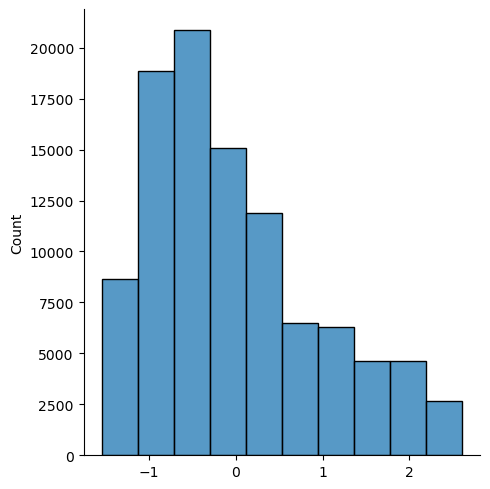

In [17]:
from scipy import stats
import numpy as np
import seaborn as sns

# Calculating on a single column, e.g. loan amount
z_scores = stats.zscore(df_dropped["loan_amnt"])
sns.displot(z_scores, bins = 10)

Observations:
- Loan amount follows a distribution close to normal (a bit 'skewed' to the left)
- Do we have any outliers? This depends on how we define outlier (ie. where we set the threshold), as per example below:

In [18]:
# Threshold = 3
for threshold in np.arange(2,3, 0.25):
    thresh = threshold
    print(f"Threshold == {thresh}, {df_dropped[np.abs(z_scores)>thresh].shape[0]} outliers ")

Threshold == 2.0, 6602 outliers 
Threshold == 2.25, 2605 outliers 
Threshold == 2.5, 2293 outliers 
Threshold == 2.75, 0 outliers 


Now let's calculate across all numeric features, no longer single feature:

In [19]:
# Calculate z-scores for all numerical columns
z_scores = df_dropped.select_dtypes(include=[np.number]).apply(stats.zscore)

# Identify outliers
outliers = (np.abs(z_scores) > 3)

# Count the number of outliers in each column
outlier_counts = outliers.sum()

# Display the sum of outliers by column
print(outlier_counts)

id                               0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
installment                    682
annual_inc                     567
dti                              0
delinq_2yrs                   2346
fico_range_low                1107
fico_range_high               1107
inq_last_6mths                1009
mths_since_last_delinq           0
open_acc                      1428
pub_rec                       1807
revol_bal                     1375
total_acc                      998
out_prncp                     2704
out_prncp_inv                 2703
total_pymnt                   1189
total_pymnt_inv               1184
total_rec_prncp                709
total_rec_int                 2130
total_rec_late_fee            1186
recoveries                    2068
collection_recovery_fee       1982
last_pymnt_amnt               2707
last_fico_range_high             9
last_fico_range_low           1790
collections_12_mths_

c:\Users\U-ser\anaconda3\envs\python_3_12_8\Lib\site-packages\pandas\core\apply.py:1081: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  results[i] = self.func(v, *self.args, **self.kwargs)


### <span style="color:BLUE"> **>>> EXERCISE:**  </span>
> Highlight the outlying values for `last_pmnt_amnt`. How do they compare to the rest of the distribution for that same column?


### Visualizing Outliers
Visualizing outliers can help understand their distribution and impact.
Boxplots (a.k.a. box and whisker plots) can be used to visualise distributions and outliers.


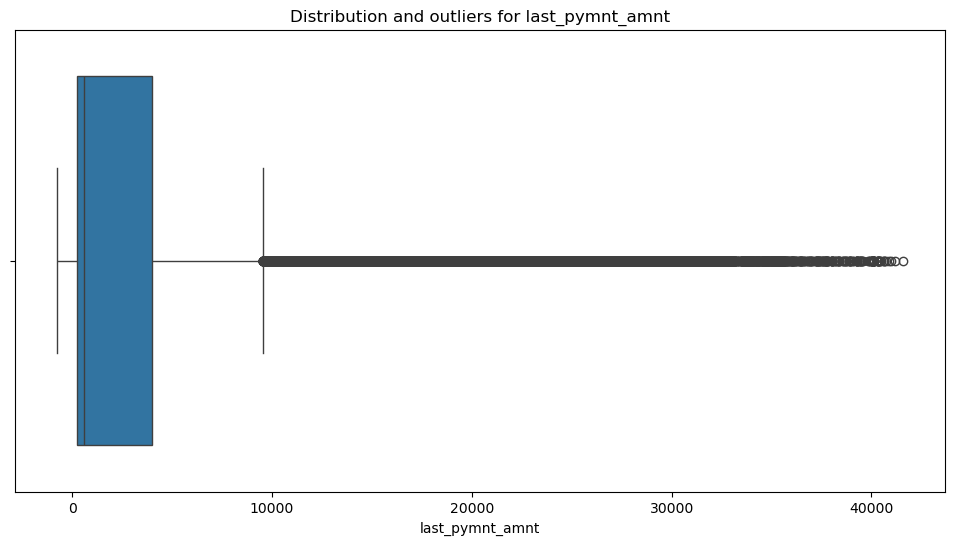

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

field_to_plot = "last_pymnt_amnt"

# Plotting variable distribution with outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_dropped[field_to_plot])
plt.title(f"Distribution and outliers for {field_to_plot}")
plt.show()


Do you notice anything unusual in the chart above?

The number of outliers is indeed different - this is because the library used adopts a differnt methodology to identify outliers, based on Interquantile Range. You can read more details [here](https://www.geeksforgeeks.org/interquartile-range-to-detect-outliers-in-data/).



### Once detected, handling outliers

Once outliers have been identified - what do we do with them?

Outliers can be handled in several ways, including removal, transformation, or capping.


In [22]:
# Option 1 - Removing outliers
field_to_treat = "last_pymnt_amnt"

df_no_outliers = df_dropped[(z_scores[field_to_treat] < threshold)]
df_no_outliers.shape

(96664, 108)

In [24]:
# Option 2 - Transforming field affected by outliers
field_to_treat_log = f"{field_to_treat}_log"

df_dropped[field_to_treat_log] = np.log1p(df_dropped[field_to_treat]+1)
print(f"Maximum value of z score after taking log: {max(np.abs(stats.zscore(df_dropped[field_to_treat_log].dropna())))}") # Added dropna() as some NAs returned (ideally to be fixed, for illustrative purposes only)

Maximum value of z score after taking log: 2.4939007150649735


c:\Users\U-ser\anaconda3\envs\python_3_12_8\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


Value to be applied as cap: 17440.045999999995
Maximum value of z score after capping: 2.84188853711322


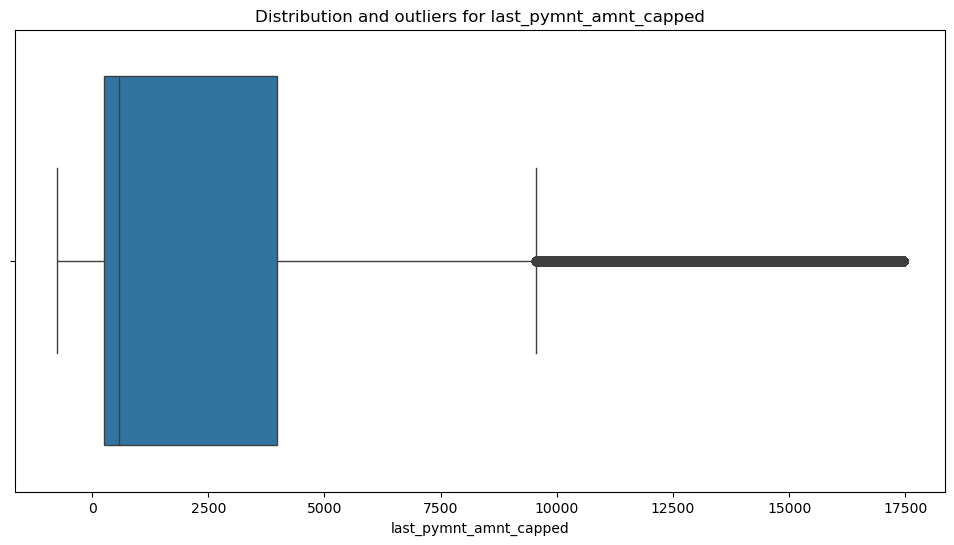

In [25]:
# Option 3 - Capping outliers
field_to_treat_capped = f"{field_to_treat}_capped"

# e.g.: Capping outliers at 95th percentile
cap_value = df_dropped[field_to_treat].quantile(0.95)
print(f"Value to be applied as cap: {cap_value}")

df_dropped[field_to_treat_capped] = np.where(df_dropped[field_to_treat] > cap_value, cap_value, df_dropped[field_to_treat])

print(f"Maximum value of z score after capping: {max(np.abs(stats.zscore(df_dropped[field_to_treat_capped])))}")

field_to_plot = field_to_treat_capped

# Plotting variable distribution with outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_dropped[field_to_plot])
plt.title(f"Distribution and outliers for {field_to_plot}")
plt.show()

Note: Capping will change the distribution, and as a result you may still see outliers.

#### Measuring Impact of Outlier Analysis

Tracking the effectiveness of outlier analysis involves comparing model performance before and after handling outliers.



### Conclusion

By detecting and handling outliers, we can improve the quality of the dataset and the performance of predictive models. In this example, we used the Z-score method for outlier detection and demonstrated various techniques for handling outliers.

### <span style="color:BLUE"> **>>> DISCUSSION:**  </span>    
- Can you think of benefits / limitations of above approaches?



6\. Text data handling
----------------------------------------

Text data often requires cleaning, such as converting to lowercase, removing special characters, and trimming whitespace.

Let us assume we needed to extract the loan ID from the url feature (not the case here, since this is already in the Id column)


In [26]:
df_dropped['url'].value_counts()[:5]

url
https://lendingclub.com/browse/loanDetail.action?loan_id=167338079    1
https://lendingclub.com/browse/loanDetail.action?loan_id=693399       1
https://lendingclub.com/browse/loanDetail.action?loan_id=119962746    1
https://lendingclub.com/browse/loanDetail.action?loan_id=161374059    1
https://lendingclub.com/browse/loanDetail.action?loan_id=74591293     1
Name: count, dtype: int64

In [27]:
import re

def extract_loan_id_from_url(mystring):
    keyword = '='
    before_keyword, keyword, after_keyword = mystring.partition(keyword)
    return after_keyword

df_dropped['loan_id_extracted'] = df_dropped['url'].apply(extract_loan_id_from_url)
df_dropped[['id','url','loan_id_extracted']][:5]

,id,url,loan_id_extracted
0,167338079,https://lendingclub.com/browse/loanDetail.acti...,167338079
1,71016917,https://lendingclub.com/browse/loanDetail.acti...,71016917
2,39589826,https://lendingclub.com/browse/loanDetail.acti...,39589826
3,134798709,https://lendingclub.com/browse/loanDetail.acti...,134798709
4,127097355,https://lendingclub.com/browse/loanDetail.acti...,127097355


Let's check how employment title is populated:

In [28]:
print("Number of unique titles:", df_dropped['emp_title'].value_counts().shape[0])
df_dropped['emp_title'].value_counts()[:10]

Number of unique titles: 40094


emp_title
Teacher             1709
Manager             1547
Owner                812
Registered Nurse     691
Driver               685
RN                   651
Supervisor           590
Sales                515
Office Manager       469
Project Manager      441
Name: count, dtype: int64

This is likely too granular for us.
Let's start by cleaning this list up and make it consistent (e.g.: "Manager" and "manager")

In [29]:
# Cleaning text data
df_dropped['emp_title_clean'] = df_dropped['emp_title'].str.lower().str.strip()
df_dropped['emp_title_clean'].value_counts()[:10]

emp_title_clean
teacher             2121
manager             2062
owner               1245
registered nurse    1019
driver              1008
supervisor           978
sales                765
rn                   758
office manager       670
truck driver         612
Name: count, dtype: int64

In [30]:
df_dropped['emp_title_manager'] = df_dropped['emp_title_clean'].str.contains("manager")
df_dropped['emp_title_manager'].value_counts()

emp_title_manager
False    77148
True     13898
Name: count, dtype: int64

In [31]:
selected_columns = df_dropped[["emp_title_manager", "emp_title_clean"]]
unique_combinations = selected_columns.drop_duplicates()
unique_combinations.head(10)

,emp_title_manager,emp_title_clean
0,False,cashier
1,False,abm
2,False,driver
3,NaN,NaN
4,False,shipping clerk
5,False,csr
6,False,cdc lll
7,False,snr scientist
9,False,pharmacist
10,False,billing specialist



### Joining to external data

Even after this initial cleaning, the number of job families is still very granular for analysis (92!).
The Lending Club business has created an internal mapping document provided (see `data/1-raw/emp_title_mapping.csv` file).

We will now be joining our data to this reference file to be able to leverage the same categories adopted by the business.

In [32]:
ref_job_families = pd.read_csv(rf"{path_python_material}/data/1-raw/emp_title_mapping.csv")
ref_job_families.head()

print(f"Number of existing job families: {ref_job_families.Category.nunique()}")

Number of existing job families: 32


In [33]:
df_mapped = pd.merge(left = df_dropped
                     , right = ref_job_families
                     , left_on = "emp_title_clean"
                     , right_on= "Job Title"
                     , how = "left"
                    )


Let's perform a basic quality check by counting number of records before and after join:

In [34]:
print(df_dropped.shape, df_mapped.shape)

(100000, 113) (102265, 115)


The number of records has increased, which is a sign that something has gone wrong. **Can you think of a reason for it?**

**Further reading**: (more on joins [here](https://www.atlassian.com/data/sql/sql-join-types-explained-visually) )

In [35]:
# Let's check if there are any duplicates in the reference file:
print(ref_job_families.shape)
print(ref_job_families.drop_duplicates().shape)

(91, 2)
(89, 2)


In [36]:
ref_job_families.groupby(["Category", "Job Title"]).size().reset_index(name='count')

,Category,Job Title,count
0,Administrative,administrative assistant,1
1,Administrative,deputy clerk,1
2,Administrative,facility administrator,1
3,Administrative,office manager,1
4,Administrative,program administrator,1
5,Agriculture,herdsman,1
6,Animal Care,kennel manager,1
7,Construction,ironworker,1
8,Consulting,consultant,1
9,Content/Media,web editor,1


In [37]:
# The problem can be seen by grouping the ref data by job title and category:
row_count = ref_job_families.groupby(["Category", "Job Title"]).size().reset_index(name='count')
row_count[row_count['count'] > 1]

,Category,Job Title,count
17,Education,teacher,2
35,Healthcare,medical assistant,2


In [38]:
ref_job_families[ref_job_families["Job Title"] == "medical assistant"]


,Job Title,Category
70,medical assistant,Healthcare
88,medical assistant,Healthcare


There you go! There are duplicates in the reference files which we want to remove to ensure 1:1 mapping of job families to the reference file. Let's remove duplicates and join again:

In [39]:
ref_job_families_deduped = ref_job_families.drop_duplicates()
print(ref_job_families.shape, ref_job_families_deduped.shape)

(91, 2) (89, 2)


In [40]:
df_mapped_deduped = pd.merge(left = df_dropped
                     , right = ref_job_families_deduped
                     , left_on = "emp_title_clean"
                     , right_on= "Job Title"
                     , how = "left"
                    )


In [41]:
print(df_dropped.shape, df_mapped_deduped.shape)

(100000, 113) (100000, 115)


In [42]:
df_mapped_deduped.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,hardship_status,debt_settlement_flag,last_pymnt_amnt_log,last_pymnt_amnt_capped,loan_id_extracted,emp_title_clean,emp_title_manager,Job Title,Category
0,167338079,4000.0,4000.0,4000.0,36 months,13.08%,134.93,B,B5,cashier,10+ years,MORTGAGE,48000.0,Source Verified,Mar-2020,Current,n,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,Home improvement,115xx,NY,20.25,1.0,Dec-2004,665.0,669.0,0.0,19.0,4.0,1.0,1988.0,82.8%,12.0,w,3816.34,3816.34,266.950000,266.95,183.66,83.29,0.0,0.0,0.0,May-2020,134.93,May-2020,669.0,665.0,1.0,1.0,Individual,0.0,3832.0,259024.0,0.0,1.0,0.0,1.0,16.0,9960.0,56.0,0.0,0.0,0.0,59.0,2400.0,1.0,0.0,0.0,1.0,64756.0,NaN,NaN,0.0,0.0,179.0,75.0,38.0,16.0,2.0,NaN,16.0,1.0,0.0,2.0,0.0,1.0,5.0,2.0,5.0,2.0,4.0,0.0,0.0,0.0,0.0,75.0,NaN,1.0,0.0,395328.0,11948.0,0.0,17928.0,N,No Hardship,N,4.919470,134.93,167338079,cashier,False,NaN,NaN
1,71016917,24000.0,24000.0,24000.0,60 months,9.16%,500.07,B,B2,ABM,6 years,RENT,57000.0,Source Verified,Feb-2016,Current,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Credit card refinancing,708xx,LA,25.33,0.0,Jan-2004,680.0,684.0,0.0,NaN,10.0,0.0,22697.0,64.5%,24.0,w,4333.29,4333.29,25496.160000,25496.16,19666.71,5829.45,0.0,0.0,0.0,May-2020,500.07,May-2020,704.0,700.0,0.0,1.0,Individual,0.0,0.0,61815.0,0.0,3.0,0.0,3.0,14.0,39118.0,72.0,1.0,1.0,2137.0,67.0,35200.0,0.0,7.0,0.0,4.0,6182.0,7741.0,40.5,0.0,0.0,145.0,137.0,7.0,7.0,0.0,7.0,24.0,0.0,3.0,5.0,5.0,6.0,15.0,7.0,9.0,5.0,10.0,0.0,0.0,0.0,1.0,95.8,60.0,0.0,0.0,88154.0,61815.0,13000.0,52954.0,N,No Hardship,N,6.218740,500.07,71016917,abm,False,NaN,NaN
2,39589826,5000.0,5000.0,5000.0,36 months,10.49%,162.49,B,B3,driver,10+ years,MORTGAGE,55000.0,Not Verified,Jan-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Credit card refinancing,347xx,FL,7.22,0.0,Apr-2010,665.0,669.0,0.0,NaN,7.0,1.0,6001.0,52.6%,9.0,f,0.00,0.00,5846.672836,5846.67,5000.00,846.67,0.0,0.0,0.0,Jan-2018,162.43,May-2020,789.0,785.0,0.0,1.0,Individual,0.0,0.0,159131.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11400.0,NaN,NaN,NaN,4.0,22733.0,4521.0,54.8,0.0,0.0,57.0,57.0,14.0,9.0,1.0,14.0,1.0,0.0,3.0,5.0,3.0,3.0,2.0,5.0,6.0,5.0,7.0,0.0,0.0,0.0,1.0,100.0,33.3,0.0,1.0,171118.0,13124.0,10000.0,7526.0,N,No Hardship,N,5.102485,162.43,39589826,driver,False,NaN,NaN
3,134798709,24000.0,24000.0,24000.0,60 months,11.05%,522.42,B,B4,NaN,NaN,MORTGAGE,43500.0,Not Verified,Jun-2018,Current,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt con

The files are both of the same size now.

This example showed the importance of checking for key data quality indicators like row count.

### Data export
Before moving to the last section on time series, let's export our data to the "intermediate" data folder.

In [43]:
df_mapped_deduped.to_csv(rf"{path_python_material}/data/2-intermediate/df_out_dsif2.csv"
                        , index = False)